In [1]:
import datasets
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import ast
import os
import datasets

In [2]:
import shutil
from datasets import config

cache_dir = config.HF_DATASETS_CACHE
shutil.rmtree(cache_dir, ignore_errors=True)

In [3]:
dfs = { 
    category: datasets.load_dataset(
        'tiginamaria/bug-localization', 
        category,
        split='dev',
        ignore_verifications=True,
    ).to_pandas()
    for category in ['py', 'java', 'kt', 'mixed']
}

/home/tigina/bug-localization/venv/lib/python3.10/site-packages/datasets/load.py:2516: FutureWarning: 'ignore_verifications' was deprecated in favor of 'verification_mode' in version 2.9.1 and will be removed in 3.0.0.
You can remove this warning by passing 'verification_mode=no_checks' instead.
  warnings.warn(


Generating dev split:   0%|          | 0/4339 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/4 [00:00<?, ? examples/s]

Generating train split:   0%|          | 0/4335 [00:00<?, ? examples/s]

/home/tigina/bug-localization/venv/lib/python3.10/site-packages/datasets/load.py:2516: FutureWarning: 'ignore_verifications' was deprecated in favor of 'verification_mode' in version 2.9.1 and will be removed in 3.0.0.
You can remove this warning by passing 'verification_mode=no_checks' instead.
  warnings.warn(


Generating dev split:   0%|          | 0/2522 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/40 [00:00<?, ? examples/s]

Generating train split:   0%|          | 0/2482 [00:00<?, ? examples/s]

/home/tigina/bug-localization/venv/lib/python3.10/site-packages/datasets/load.py:2516: FutureWarning: 'ignore_verifications' was deprecated in favor of 'verification_mode' in version 2.9.1 and will be removed in 3.0.0.
You can remove this warning by passing 'verification_mode=no_checks' instead.
  warnings.warn(


Generating dev split:   0%|          | 0/618 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/14 [00:00<?, ? examples/s]

Generating train split:   0%|          | 0/604 [00:00<?, ? examples/s]

/home/tigina/bug-localization/venv/lib/python3.10/site-packages/datasets/load.py:2516: FutureWarning: 'ignore_verifications' was deprecated in favor of 'verification_mode' in version 2.9.1 and will be removed in 3.0.0.
You can remove this warning by passing 'verification_mode=no_checks' instead.
  warnings.warn(


Generating dev split:   0%|          | 0/2322 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/2 [00:00<?, ? examples/s]

Generating train split:   0%|          | 0/2320 [00:00<?, ? examples/s]

In [27]:
repos_columns = ['repo_symbols_count', 'repo_tokens_count', 'repo_lines_count', 'repo_files_without_tests_count']
diff_columns = ['changed_symbols_count', 'changed_tokens_count', 'changed_lines_count', 'changed_files_count', 'changed_files_without_tests_count']
issue_columns = ['issue_symbols_count', 'issue_words_count', 'issue_tokens_count', 'issue_lines_count', 'issue_links_count', 'issue_code_blocks_count']

In [28]:
print("Data point count:")
print("total:", len(dfs['py']) + len(dfs['java']) + len(dfs['kt']) + len(dfs['mixed']))
print("py:", len(dfs['py']))
print("java:", len(dfs['java']))
print("kt:", len(dfs['kt']))
print("mixed:", len(dfs['mixed']))

Data point count:
total: 9801
py: 4339
java: 2522
kt: 618
mixed: 2322


In [29]:
print("Repos count:")
print("total:", len(dfs['py'][['repo_owner', 'repo_name']].drop_duplicates()) + 
      len(dfs['java'][['repo_owner', 'repo_name']].drop_duplicates()) + 
      len(dfs['kt'][['repo_owner', 'repo_name']].drop_duplicates()) + 
      len(dfs['mixed'][['repo_owner', 'repo_name']].drop_duplicates()))
print("py:", len(dfs['py'][['repo_owner', 'repo_name']].drop_duplicates()))
print("java:", len(dfs['java'][['repo_owner', 'repo_name']].drop_duplicates()))
print("kt:", len(dfs['kt'][['repo_owner', 'repo_name']].drop_duplicates()))
print("mixed:", len(dfs['mixed'][['repo_owner', 'repo_name']].drop_duplicates()))

Repos count:
total: 1414
py: 524
java: 296
kt: 51
mixed: 543


# Python

In [30]:
dfs['py'][:5]

,id,text_id,repo_owner,repo_name,issue_url,pull_url,comment_url,links_count,link_keyword,issue_title,...,issue_words_count,issue_tokens_count,issue_lines_count,issue_links_count,issue_code_blocks_count,pull_create_at,stars,language,languages,license
0,8543,thealgorithms/python/295/289,thealgorithms,python,https://github.com/TheAlgorithms/Python/issues...,https://github.com/TheAlgorithms/Python/pull/295,https://github.com/TheAlgorithms/Python/pull/295,1,fixes,ProjectEuler -- Problem 1 -- solv2.py -- Error,...,15,57,2,1,3,2018-04-16 13:59:32,162825,Python,"{'Python': 2826228, 'Dockerfile': 406}",MIT License
1,5531,electron/electron/8668/8555,electron,electron,https://github.com/electron/electron/issues/8555,https://github.com/electron/electron/pull/8668,https://github.com/electron/electron/pull/8668,1,close,Mac app store build uses non-public APIs,...,81,128,15,0,0,2017-02-13 07:46:55,108449,C++,"{'C++': 3465887, 'TypeScript': 1859500, 'Objec...",MIT License
2,5532,electron/electron/8640/8608,electron,electron,https://github.com/electron/electron/issues/8608,https://github.com/electron/electron/pull/8640,https://github.com/electron/electron/pull/8640,1,close,Debug symbols not generated for Release build,...,26,36,1,0,0,2017-02-09 07:53:27,108449,C++,"{'C++': 3465887, 'TypeScript': 1859500, 'Objec...",MIT License
3,6847,keras-team/keras/18352/15282,keras-team,keras,https://github.com/keras-team/keras/issues/15282,https://github.com/keras-team/keras/pull/18352,https://github.com/keras-team/keras/pull/18352,1,solve,MobileNetV3 models can't infer the static shape,...,452,1229,103,3,1,2023-08-18 10:34:29,58976,Python,"{'Python': 11774453, 'Starlark': 290645, 'Shel...",Apache License 2.0
4,6848,keras-team/keras/17498/17199,keras-team,keras,https://github.com/keras-team/keras/issues/17199,https://github.com/keras-team/keras/pull/17498,https://github.com/keras-team/keras/pull/17498,1,fixes,efficientnetBx model.save() fails due to seria...,...,316,827,59,1,0,2023-01-30 07:49:59,58976,Python,"{'Python': 11774453, 'Starlark': 290645, 'Shel...",Apache License 2.0


In [31]:
dfs['py'][repos_columns].describe(percentiles=[.33, .66])

,repo_symbols_count,repo_tokens_count,repo_lines_count,repo_files_without_tests_count
count,4.339000e+03,4.339000e+03,4.339000e+03,4339.000000
mean,2.093416e+06,4.922984e+05,5.521676e+04,310.862872
std,3.140994e+06,8.868087e+05,8.313124e+04,476.638268
min,3.210000e+02,7.800000e+01,9.000000e+00,1.000000
33%,5.439393e+05,1.223429e+05,1.606600e+04,85.000000
50%,8.921410e+05,1.976850e+05,2.466000e+04,141.000000
66%,1.878619e+06,4.387803e+05,5.153300e+04,268.000000
max,9.880201e+07,3.817069e+07,3.077782e+06,12013.000000


In [80]:
dfs['py'][diff_columns].describe(percentiles=[.33, .66])

,changed_symbols_count,changed_tokens_count,changed_lines_count,changed_files_count,changed_files_without_tests_count
count,4338.000000,4338.000000,4338.000000,4338.000000,4338.000000
mean,1316.760719,288.304749,27.708852,2.085062,1.621946
std,2408.738121,520.981946,50.159339,1.802287,1.454877
min,1.000000,1.000000,1.000000,1.000000,1.000000
33%,286.000000,63.000000,6.000000,1.000000,1.000000
50%,513.000000,113.500000,10.000000,2.000000,1.000000
66%,937.260000,205.000000,20.000000,2.000000,1.000000
max,27453.000000,5909.000000,584.000000,21.000000,20.000000


In [33]:
dfs['py'][issue_columns].describe(percentiles=[.33, .66])

,issue_symbols_count,issue_words_count,issue_tokens_count,issue_lines_count,issue_links_count,issue_code_blocks_count
count,4339.000000,4339.000000,4339.000000,4339.000000,4339.000000,4339.000000
mean,1434.727587,140.388108,397.038488,29.144273,0.752247,0.954598
std,1892.147178,150.413773,541.757887,36.036595,1.672649,1.218996
min,43.000000,1.000000,13.000000,1.000000,0.000000,0.000000
33%,459.000000,58.000000,116.000000,10.000000,0.000000,0.000000
50%,768.000000,91.000000,199.000000,18.000000,0.000000,1.000000
66%,1252.080000,140.000000,332.000000,29.000000,1.000000,1.000000
max,30201.000000,1414.000000,4491.000000,586.000000,56.000000,11.000000


# Java

In [34]:
dfs['java'][:5]

,id,text_id,repo_owner,repo_name,issue_url,pull_url,comment_url,links_count,link_keyword,issue_title,...,issue_words_count,issue_tokens_count,issue_lines_count,issue_links_count,issue_code_blocks_count,pull_create_at,stars,language,languages,license
0,162,square/okhttp/1085/1034,square,okhttp,https://github.com/square/okhttp/issues/1034,https://github.com/square/okhttp/pull/1085,https://github.com/square/okhttp/pull/1085,1,closes,SpdyConnection.pushExecutor has zero keep-aliv...,...,53,105,6,1,0,2014-10-11 14:11:59,44252,Kotlin,"{'Kotlin': 3059143, 'Java': 744989, 'Shell': 2...",Apache License 2.0
1,161,square/okhttp/1106/938,square,okhttp,https://github.com/square/okhttp/issues/938,https://github.com/square/okhttp/pull/1106,https://github.com/square/okhttp/pull/1106,1,closes,SpdyConnection synchronization problem in goAway,...,24,43,2,0,0,2014-10-26 14:28:50,44252,Kotlin,"{'Kotlin': 3059143, 'Java': 744989, 'Shell': 2...",Apache License 2.0
2,170,square/okhttp/518/184,square,okhttp,https://github.com/square/okhttp/issues/184,https://github.com/square/okhttp/pull/518,https://github.com/square/okhttp/pull/518,1,closes,"OkHttp changes the global SSL context, breaks ...",...,183,605,27,0,0,2014-02-09 00:24:27,44252,Kotlin,"{'Kotlin': 3059143, 'Java': 744989, 'Shell': 2...",Apache License 2.0
3,169,square/okhttp/628/627,square,okhttp,https://github.com/square/okhttp/issues/627,https://github.com/square/okhttp/pull/628,https://github.com/square/okhttp/pull/628,1,fix,SpdyConnection clears the old settings without...,...,84,152,6,1,0,2014-03-10 21:05:36,44252,Kotlin,"{'Kotlin': 3059143, 'Java': 744989, 'Shell': 2...",Apache License 2.0
4,168,square/okhttp/631/627,square,okhttp,https://github.com/square/okhttp/issues/627,https://github.com/square/okhttp/pull/631,https://github.com/square/okhttp/pull/631,1,fix,SpdyConnection clears the old settings without...,...,84,152,6,1,0,2014-03-11 04:15:42,44252,Kotlin,"{'Kotlin': 3059143, 'Java': 744989, 'Shell': 2...",Apache License 2.0


In [67]:
dfs['java'][repos_columns].describe(percentiles=[.33, .66])

,repo_symbols_count,repo_tokens_count,repo_lines_count,repo_files_without_tests_count
count,2.520000e+03,2.520000e+03,2.520000e+03,2520.000000
mean,1.002477e+07,2.005777e+06,2.588264e+05,2195.248810
std,1.997741e+07,4.094885e+06,4.961800e+05,2842.182893
min,3.258600e+04,6.587000e+03,9.920000e+02,12.000000
33%,2.349014e+06,4.911990e+05,6.593105e+04,469.000000
50%,4.885507e+06,1.021284e+06,1.356030e+05,1112.000000
66%,1.001490e+07,2.011372e+06,2.695589e+05,2456.000000
max,2.422849e+08,4.924220e+07,6.198704e+06,28101.000000


In [68]:
dfs['java'][diff_columns].describe(percentiles=[.33, .66])

,changed_symbols_count,changed_tokens_count,changed_lines_count,changed_files_count,changed_files_without_tests_count
count,2520.000000,2520.000000,2520.000000,2520.000000,2520.000000
mean,1675.617857,319.666270,31.339286,2.490476,1.921429
std,2911.273316,548.687211,53.695600,2.455945,1.966012
min,1.000000,1.000000,1.000000,1.000000,1.000000
33%,396.270000,78.000000,7.000000,1.000000,1.000000
50%,733.000000,140.000000,14.000000,2.000000,1.000000
66%,1301.080000,246.000000,24.000000,2.000000,2.000000
max,36124.000000,6501.000000,561.000000,22.000000,17.000000


In [69]:
dfs['java'][issue_columns].describe(percentiles=[.33, .66])

,issue_symbols_count,issue_words_count,issue_tokens_count,issue_lines_count,issue_links_count,issue_code_blocks_count
count,2520.000000,2520.000000,2520.000000,2520.000000,2520.000000,2520.000000
mean,2081.442063,164.293254,518.576984,39.772222,0.928175,1.003968
std,2644.187297,142.739524,653.699664,38.839003,1.567079,1.426784
min,45.000000,2.000000,13.000000,1.000000,0.000000,0.000000
33%,686.000000,81.000000,166.000000,16.000000,0.000000,0.000000
50%,1101.500000,123.000000,269.500000,29.000000,0.000000,1.000000
66%,1799.000000,176.000000,453.000000,45.000000,1.000000,1.000000
max,21259.000000,1386.000000,4473.000000,325.000000,19.000000,31.000000


# Kotlin

In [70]:
dfs['kt'][:5]

,id,text_id,repo_owner,repo_name,issue_url,pull_url,comment_url,links_count,link_keyword,issue_title,...,issue_words_count,issue_tokens_count,issue_lines_count,issue_links_count,issue_code_blocks_count,pull_create_at,stars,language,languages,license
0,785,airbnb/lottie-android/2078/2077,airbnb,lottie-android,https://github.com/airbnb/lottie-android/issue...,https://github.com/airbnb/lottie-android/pull/...,https://github.com/airbnb/lottie-android/pull/...,1,fixes,Compose: LottieAnimation recomposes on every f...,...,173,293,21,1,0,2022-05-19 17:45:55,34121,Java,"{'Java': 806601, 'Kotlin': 346277, 'Shell': 22...",Apache License 2.0
1,1638,square/leakcanary/1935/1912,square,leakcanary,https://github.com/square/leakcanary/issues/1912,https://github.com/square/leakcanary/pull/1935,https://github.com/square/leakcanary/pull/1935,1,fixes,View with Application mContext should not be c...,...,49,87,10,1,1,2020-09-18 00:14:32,28557,Kotlin,"{'Kotlin': 1363625, 'Java': 4762, 'Shell': 481...",Apache License 2.0
2,1632,square/leakcanary/2144/2137,square,leakcanary,https://github.com/square/leakcanary/issues/2137,https://github.com/square/leakcanary/pull/2144,https://github.com/square/leakcanary/pull/2144,2,fixes,RootViewWatcher onRootViewAdd crashed,...,82,410,39,0,1,2021-06-29 15:27:41,28557,Kotlin,"{'Kotlin': 1363625, 'Java': 4762, 'Shell': 481...",Apache License 2.0
3,1640,square/leakcanary/1913/1896,square,leakcanary,https://github.com/square/leakcanary/issues/1896,https://github.com/square/leakcanary/pull/1913,https://github.com/square/leakcanary/pull/1913,1,fixes,"Android 9 crash in debug build, version leackc...",...,114,693,48,0,1,2020-08-31 08:26:12,28557,Kotlin,"{'Kotlin': 1363625, 'Java': 4762, 'Shell': 481...",Apache License 2.0
4,1639,square/leakcanary/1927/1910,square,leakcanary,https://github.com/square/leakcanary/issues/1910,https://github.com/square/leakcanary/pull/1927,https://github.com/square/leakcanary/pull/1927,1,fixes,InternalAppWatcher.install should check if the...,...,32,85,9,1,1,2020-09-16 16:52:59,28557,Kotlin,"{'Kotlin': 1363625, 'Java': 4762, 'Shell': 481...",Apache License 2.0


In [71]:
dfs['kt'][repos_columns].describe(percentiles=[.33, .66])

,repo_symbols_count,repo_tokens_count,repo_lines_count,repo_files_without_tests_count
count,6.180000e+02,6.180000e+02,618.000000,618.000000
mean,1.944103e+06,4.253496e+05,51457.872168,545.182848
std,1.677125e+06,3.688581e+05,43284.424227,418.241972
min,3.052600e+04,6.775000e+03,926.000000,13.000000
33%,7.225642e+05,1.490211e+05,18820.010000,218.000000
50%,1.521317e+06,3.208455e+05,41097.000000,525.000000
66%,2.093044e+06,4.626026e+05,54441.000000,684.000000
max,5.921271e+06,1.299833e+06,154560.000000,1484.000000


In [72]:
dfs['kt'][diff_columns].describe(percentiles=[.33, .66])

,changed_symbols_count,changed_tokens_count,changed_lines_count,changed_files_count,changed_files_without_tests_count
count,618.000000,618.000000,618.000000,618.000000,618.000000
mean,1340.980583,277.289644,26.571197,2.705502,1.889968
std,2006.183012,404.727067,40.072450,2.335825,1.861718
min,22.000000,5.000000,1.000000,1.000000,1.000000
33%,404.000000,87.610000,8.000000,2.000000,1.000000
50%,738.500000,156.000000,14.000000,2.000000,1.000000
66%,1121.440000,237.440000,23.000000,3.000000,2.000000
max,19952.000000,3543.000000,350.000000,19.000000,15.000000


In [73]:
dfs['kt'][issue_columns].describe(percentiles=[.33, .66])

,issue_symbols_count,issue_words_count,issue_tokens_count,issue_lines_count,issue_links_count,issue_code_blocks_count
count,618.000000,618.000000,618.000000,618.000000,618.000000,618.000000
mean,1747.792880,141.428803,422.632686,36.938511,0.472492,1.135922
std,2377.423573,101.761371,541.799717,31.067127,0.819171,1.189216
min,49.000000,6.000000,13.000000,1.000000,0.000000,0.000000
33%,722.000000,86.000000,181.000000,22.000000,0.000000,1.000000
50%,973.500000,120.500000,251.000000,31.000000,0.000000,1.000000
66%,1369.100000,163.000000,342.440000,38.000000,1.000000,1.000000
max,18981.000000,974.000000,4070.000000,225.000000,9.000000,10.000000


# Mixed

In [74]:
dfs['mixed']

,id,text_id,repo_owner,repo_name,issue_url,pull_url,comment_url,links_count,link_keyword,issue_title,...,issue_words_count,issue_tokens_count,issue_lines_count,issue_links_count,issue_code_blocks_count,pull_create_at,stars,language,languages,license
0,5530,electron/electron/11103/11101,electron,electron,https://github.com/electron/electron/issues/11101,https://github.com/electron/electron/pull/11103,https://github.com/electron/electron/pull/11103,1,closes,process.versions does not include new version ...,...,32,71,14,0,0,2017-11-13 06:39:40,108449,C++,"{'C++': 3465887, 'TypeScript': 1859500, 'Objec...",MIT License
1,8734,serverless/serverless/4596/4526,serverless,serverless,https://github.com/serverless/serverless/issue...,https://github.com/serverless/serverless/pull/...,https://github.com/serverless/serverless/pull/...,1,fixes,can't invoke scala locally,...,255,495,42,3,1,2017-12-20 15:37:03,44971,JavaScript,"{'JavaScript': 3650650, 'Java': 42813, 'Shell'...",MIT License
2,9263,textualize/rich/2305/2291,textualize,rich,https://github.com/Textualize/rich/issues/2291,https://github.com/Textualize/rich/pull/2305,https://github.com/Textualize/rich/pull/2305,1,fixes,[BUG] Invalid markup in a ProgressBar causes t...,...,840,1672,156,0,1,2022-05-27 11:03:19,44169,Python,"{'Python': 1370173, 'Batchfile': 799, 'Makefil...",MIT License
3,9264,textualize/rich/2296/2273,textualize,rich,https://github.com/Textualize/rich/issues/2273,https://github.com/Textualize/rich/pull/2296,https://github.com/Textualize/rich/pull/2296,1,fixes,[BUG] Text wrapping edge case,...,75,117,24,0,3,2022-05-25 11:46:33,44169,Python,"{'Python': 1370173, 'Batchfile': 799, 'Makefil...",MIT License
4,9265,textualize/rich/2294/2284,textualize,rich,https://github.com/Textualize/rich/issues/2284,https://github.com/Textualize/rich/pull/2294,https://github.com/Textualize/rich/pull/2294,1,fixes,IndexError: list index out of range when using...,...,521,1868,104,0,2,2022-05-25 09:59:53,44169,Python,"{'Python': 1370173, 'Batchfile': 799, 'Makefil...",MIT License
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2317,9975,frequenz-floss/frequenz-sdk-python/123/115,frequenz-floss,frequenz-sdk-python,https://github.com/frequenz-floss/frequenz-sdk...,https://github.com/frequenz-floss/frequenz-sdk...,https://github.com/frequenz-floss/frequenz-sdk...,1,fixes,Duplicate requests to the resampling actor cau...,...,381,1391,161,0,3,2022-12-19 14:43:38,10,Python,{'Python': 1083685},MIT License
2318,8892,gisaia/arlas-server/785/784,gisaia,arlas-server,https://github.com/gisaia/ARLAS-server/issues/784,https://github.com/gisaia/ARLAS-server/pull/785,https://github.com/gisaia/ARLAS-server/pull/785,1,fix,`checkFields` query param is ignored when PUTi...,...,41,55,4,0,0,2022-05-05 16:15:28,10,Java,"{'Java': 2030791, 'Shell': 34849, 'Mustache': ...",Apache License 2.0
2319,9974,frequenz-floss/frequenz-sdk-python/163/42,frequenz-floss,frequenz-sdk-python,https://github.com/frequenz-floss/frequenz-sdk...,https://github.com/frequenz-floss/frequenz-sdk...,https://github.com/frequenz-floss/frequenz-sdk...,1,fixes,nox: Tests using `minimum-requirements-ci.txt`...,...,141,211,21,0,0,2023-01-15 17:50:05,10,Python,{'Python': 1083685},MIT License
2320,9973,frequenz-floss/frequenz-sdk-python/445/442,frequenz-floss,frequenz-sdk-python,https://github.com/frequenz-floss/frequenz-sdk...,https://github.com/frequenz-floss/frequenz-sdk...,https://github.com/frequenz-floss/frequenz-sdk...,1,fixes,OrderedRingBuffer.__len__ returning wrong values,...,93,195,35,0,1,2023-06-16 15:20:57,10,Python,{'Python': 1083685},MIT License


In [75]:
dfs['mixed'][repos_columns].describe(percentiles=[.33, .66])

,repo_symbols_count,repo_tokens_count,repo_lines_count,repo_files_without_tests_count
count,2.322000e+03,2.322000e+03,2.322000e+03,2322.000000
mean,1.167885e+07,3.898602e+06,2.156733e+05,1438.766150
std,3.463733e+07,1.311004e+07,4.268524e+05,2394.877535
min,3.745700e+04,8.727000e+03,1.223000e+03,19.000000
33%,1.915839e+06,5.066684e+05,4.057471e+04,243.930000
50%,3.233520e+06,9.432545e+05,8.366050e+04,474.000000
66%,7.490492e+06,1.994928e+06,1.619639e+05,1040.860000
max,7.883723e+08,2.256497e+08,8.687912e+06,33644.000000


In [76]:
dfs['mixed'][diff_columns].describe(percentiles=[.33, .66])

,changed_symbols_count,changed_tokens_count,changed_lines_count,changed_files_count,changed_files_without_tests_count
count,2.322000e+03,2322.000000,2322.000000,2322.000000,2322.000000
mean,4.952786e+03,1605.805771,62.318260,4.809216,3.754091
std,5.577264e+04,22494.430100,88.055332,3.439292,2.851078
min,2.500000e+01,4.000000,1.000000,2.000000,1.000000
33%,7.630000e+02,176.000000,16.000000,3.000000,2.000000
50%,1.429000e+03,320.000000,29.000000,4.000000,3.000000
66%,2.557440e+03,570.720000,51.000000,5.000000,4.000000
max,2.493013e+06,837626.000000,594.000000,22.000000,21.000000


In [77]:
dfs['mixed'][issue_columns].describe(percentiles=[.33, .66])

,issue_symbols_count,issue_words_count,issue_tokens_count,issue_lines_count,issue_links_count,issue_code_blocks_count
count,2322.000000,2322.000000,2322.000000,2322.000000,2322.000000,2322.000000
mean,1572.804910,149.822997,404.131783,33.257106,0.841085,1.020672
std,2105.810404,151.602294,524.063765,37.975227,1.529596,1.397204
min,46.000000,3.000000,13.000000,1.000000,0.000000,0.000000
33%,546.000000,70.000000,136.930000,12.000000,0.000000,0.000000
50%,901.000000,110.000000,222.500000,23.000000,0.000000,1.000000
66%,1364.000000,154.000000,355.860000,35.000000,1.000000,1.000000
max,19828.000000,1806.000000,3979.000000,459.000000,24.000000,17.000000


In [91]:
from datasets import concatenate_datasets

df = pd.concat([dfs['py'], dfs['java'], dfs['kt'], dfs['mixed']], ignore_index=True)

for entity, columns in [
    ('project', ['repo_files_without_tests_count', 'repo_lines_count', 'repo_tokens_count']),
    ('diff', ['changed_files_without_tests_count', 'changed_lines_count', 'changed_tokens_count']),
    ('issue', ['issue_words_count', 'issue_lines_count', 'issue_tokens_count', 'issue_links_count', 'issue_code_blocks_count'])
]:
    for column in columns:
        table_line = "\\texttt" + "{" + column.replace('_', '\_') + "}"
        table_line += (" & {} & {} & {:.2f} & {}".format(
            df[column].min(), 
            int(df[column].median()), 
            df[column].mean(),
            df[column].max()))
        print(table_line + " \\\\")
    print("\midrule")

\texttt{repo\_files\_without\_tests\_count} & 1 & 331 & 1077.62 & 33644 \\
\texttt{repo\_lines\_count} & 9 & 52743 & 145377.62 & 8687912 \\
\texttt{repo\_tokens\_count} & 78 & 488286 & 1684619.92 & 225649725 \\
\midrule
\texttt{changed\_files\_without\_tests\_count} & 1 & 1 & 2.22 & 21 \\
\texttt{changed\_lines\_count} & 1 & 15 & 36.77 & 594 \\
\texttt{changed\_tokens\_count} & 1 & 158 & 607.91 & 837626 \\
\midrule
\texttt{issue\_words\_count} & 1 & 106 & 148.85 & 1806 \\
\texttt{issue\_lines\_count} & 1 & 22 & 33.35 & 586 \\
\texttt{issue\_tokens\_count} & 13 & 227 & 431.63 & 4491 \\
\texttt{issue\_links\_count} & 0 & 0 & 0.80 & 56 \\
\texttt{issue\_code\_blocks\_count} & 0 & 1 & 0.99 & 31 \\
\midrule


In [23]:
for entity, columns in [
    ('project', ['repo_files_without_tests_count', 'repo_lines_count', 'repo_tokens_count']),
    ('diff', ['changed_files_without_tests_count', 'changed_lines_count', 'changed_tokens_count']),
    ('issue', ['issue_lines_count', 'issue_tokens_count'])
]:
    for category, language in [('py', 'Python'), ('java', 'Java'), ('kt', 'Kotlin'), ('mixed', 'Mixed')]:
        table_line = "& " if language != 'Java' else f"{entity} & "
        table_line += f"{language} " if entity != 'issue' else f"{language} & - & - & - & -"
        for column in columns:
            table_line += (" & {} & {} & {:d} & {}".format(
                dfs[category][column].min(), 
                int(dfs[category][column].median()), 
                int(dfs[category][column].mean()),
                dfs[category][column].max()))
        print(table_line + " \\\\")
    print("\midrule")

& Python  & 1 & 141 & 310 & 12013 & 9 & 24660 & 55216 & 3077782 & 78 & 197685 & 492298 & 38170688 \\
project & Java  & 12 & 1112 & 2194 & 28101 & 992 & 135603 & 258724 & 6198704 & 6587 & 1021283 & 2004954 & 49242196 \\
& Kotlin  & 13 & 525 & 545 & 1484 & 926 & 41097 & 51457 & 154560 & 6775 & 320845 & 425349 & 1299833 \\
& Mixed  & 19 & 474 & 1438 & 33644 & 1223 & 83660 & 215673 & 8687912 & 8727 & 943254 & 3898602 & 225649725 \\
\midrule
& Python  & 1 & 1 & 1 & 20 & 0 & 10 & 27 & 584 & 0 & 113 & 288 & 5909 \\
diff & Java  & 1 & 1 & 1 & 17 & 0 & 14 & 31 & 561 & 0 & 140 & 319 & 6501 \\
& Kotlin  & 1 & 1 & 1 & 15 & 1 & 14 & 26 & 350 & 5 & 156 & 277 & 3543 \\
& Mixed  & 1 & 3 & 3 & 21 & 1 & 29 & 62 & 594 & 4 & 320 & 1605 & 837626 \\
\midrule
& Python & - & - & - & - & 1 & 18 & 29 & 586 & 13 & 199 & 397 & 4491 \\
issue & Java & - & - & - & - & 1 & 29 & 39 & 325 & 13 & 270 & 518 & 4473 \\
& Kotlin & - & - & - & - & 1 & 31 & 36 & 225 & 13 & 251 & 422 & 4070 \\
& Mixed & - & - & - & - & 1 & 23 

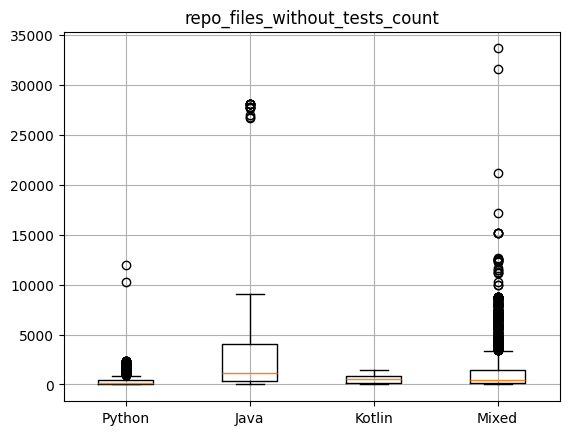

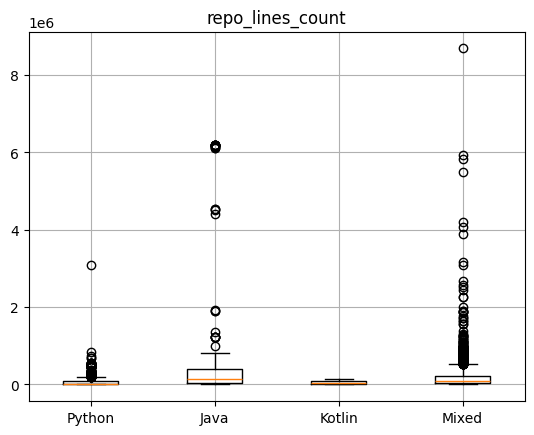

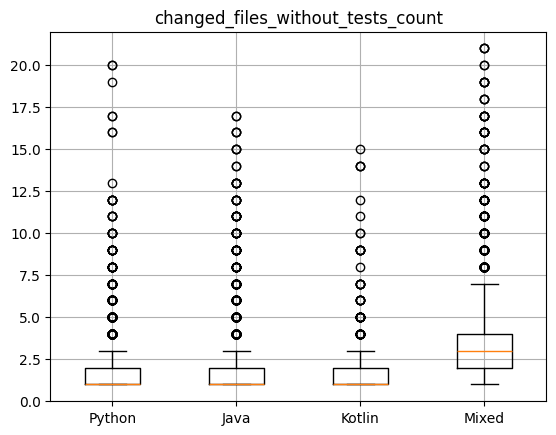

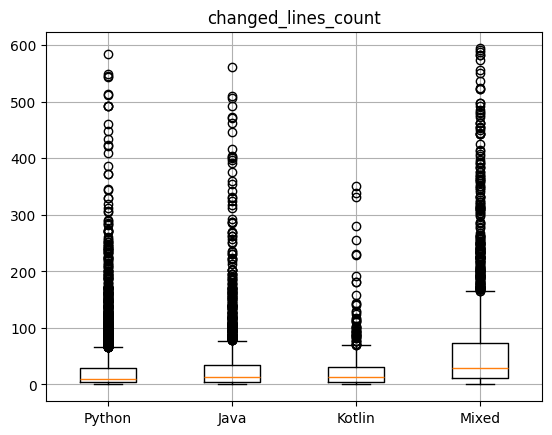

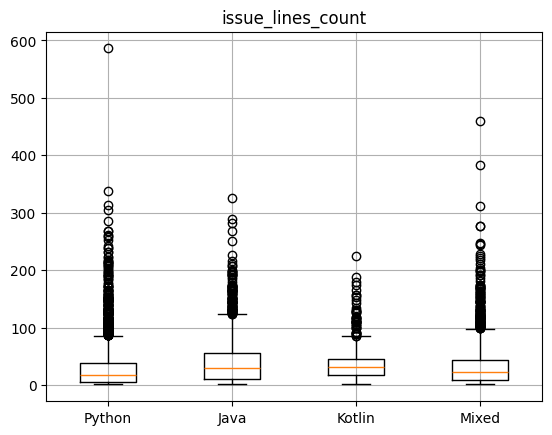

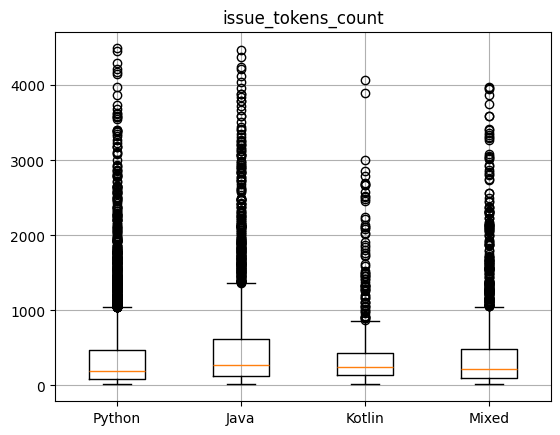

In [24]:
for entity, columns in [
    ('project', ['repo_files_without_tests_count', 'repo_lines_count']),
    ('diff', ['changed_files_without_tests_count', 'changed_lines_count']),
    ('issue', ['issue_lines_count', 'issue_tokens_count'])
]:
    for column in columns:
        data = []
        xticks = []
        for category, language in [('py', 'Python'), ('java', 'Java'), ('kt', 'Kotlin'), ('mixed', 'Mixed')]:
            data.append(dfs[category][column])
            xticks.append(language)
        plt.boxplot(data)
        plt.xticks([1, 2, 3, 4], xticks)
        plt.title(column)
        plt.grid(True)
        plt.show()

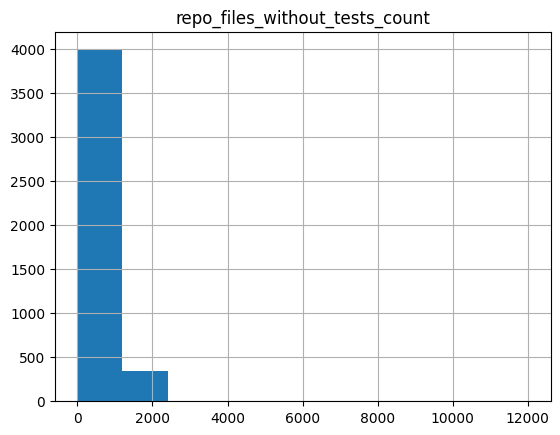

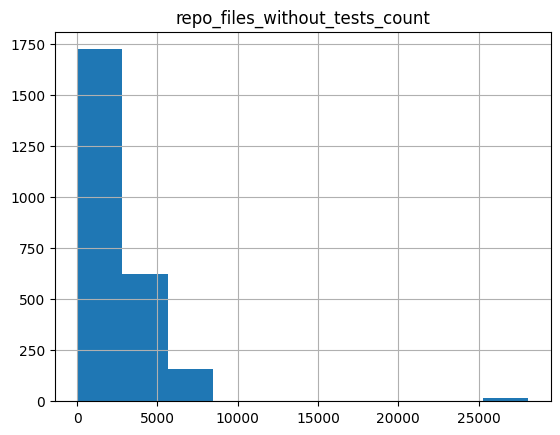

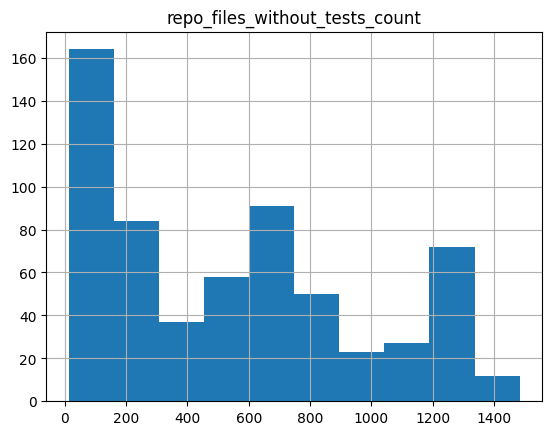

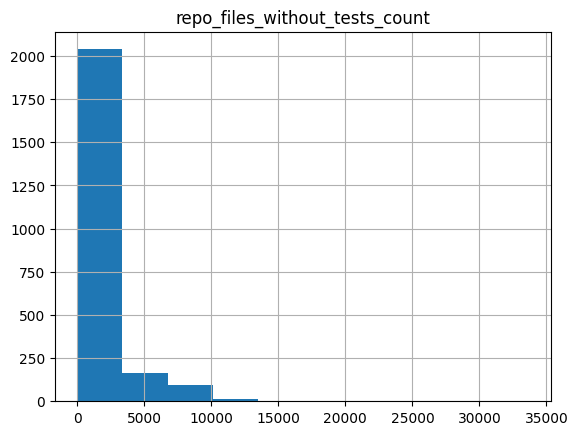

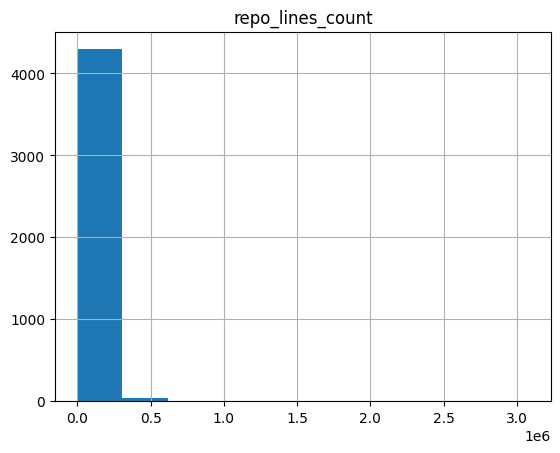

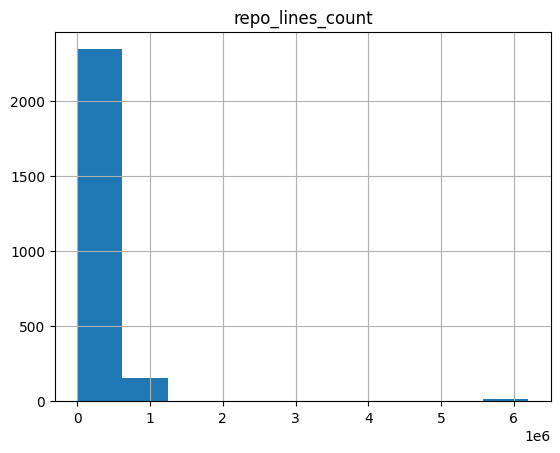

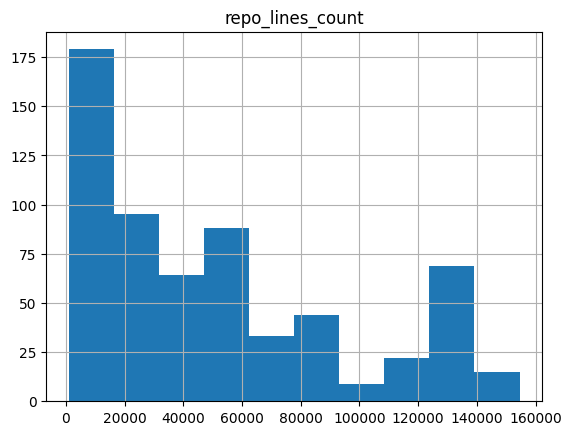

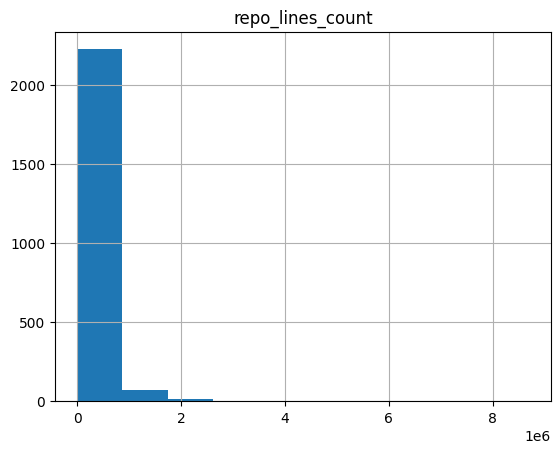

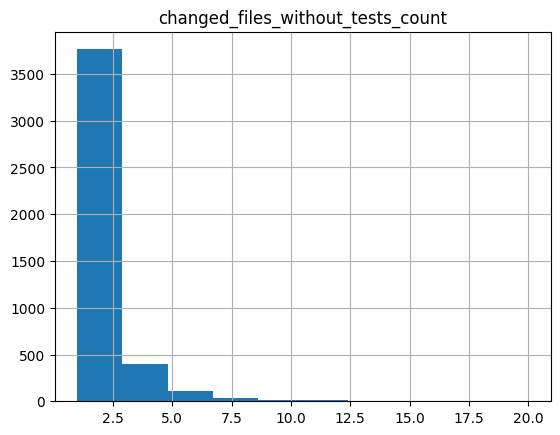

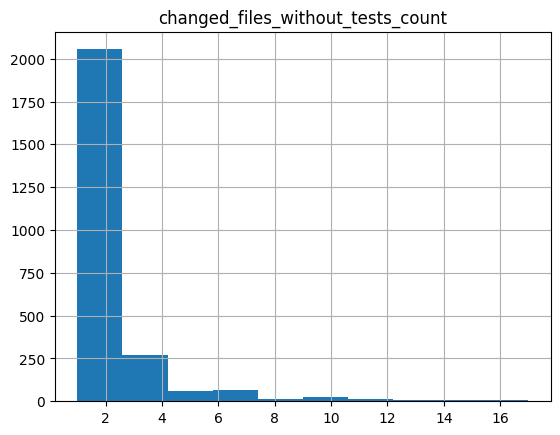

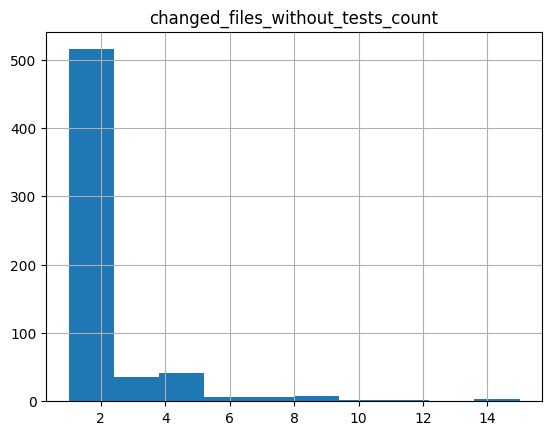

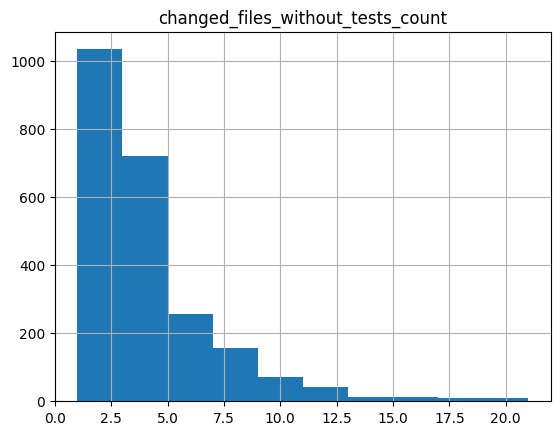

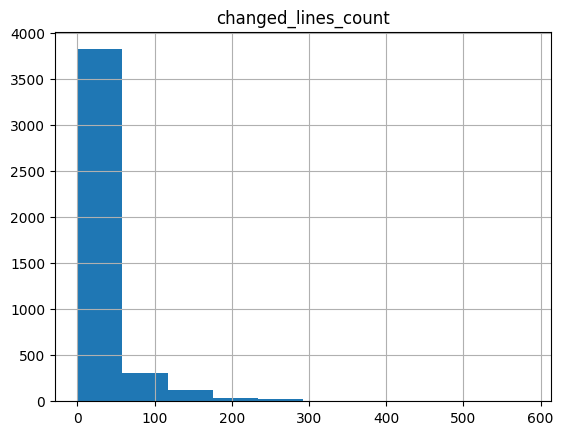

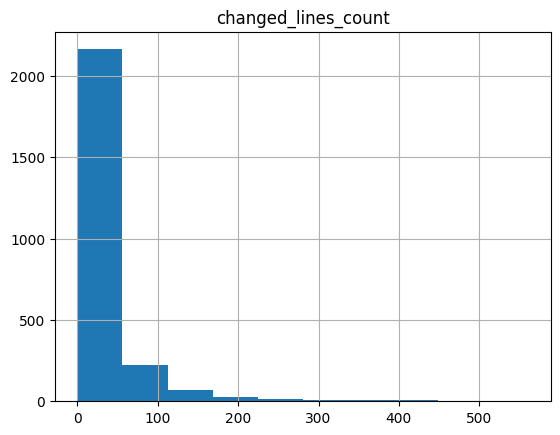

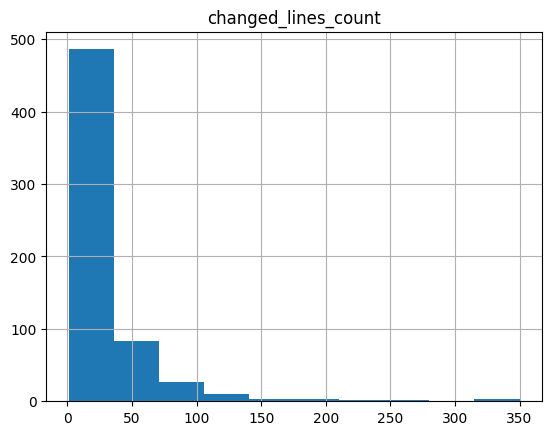

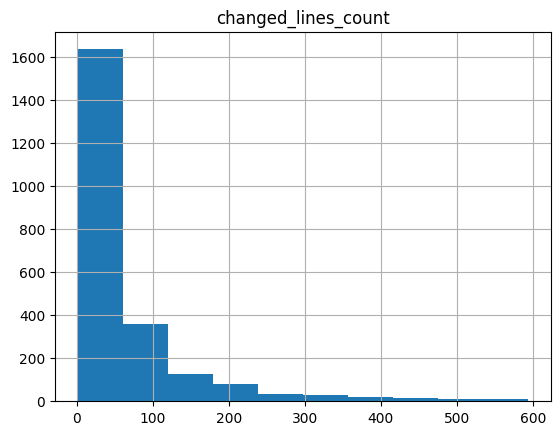

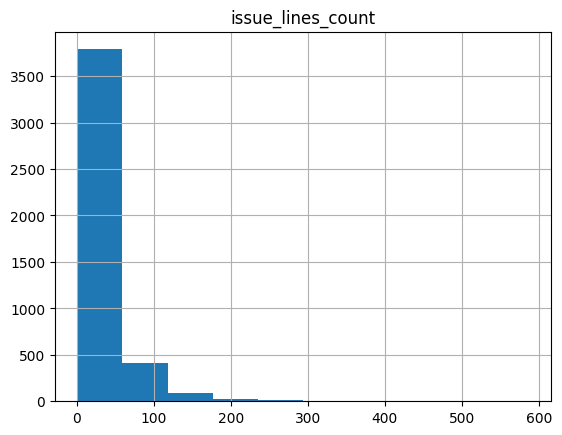

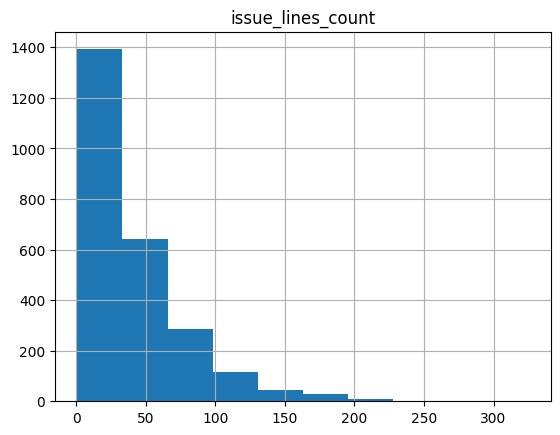

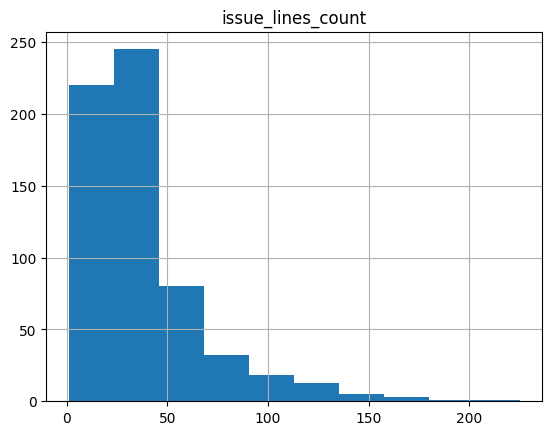

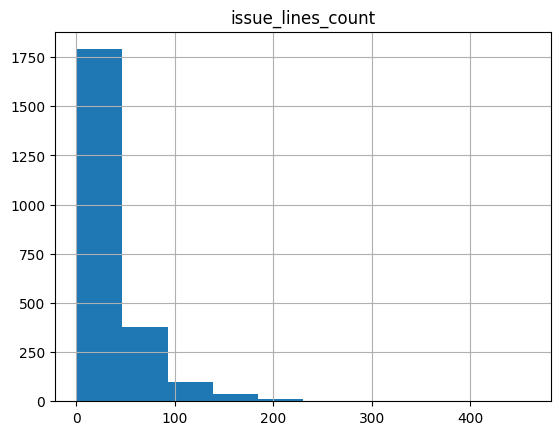

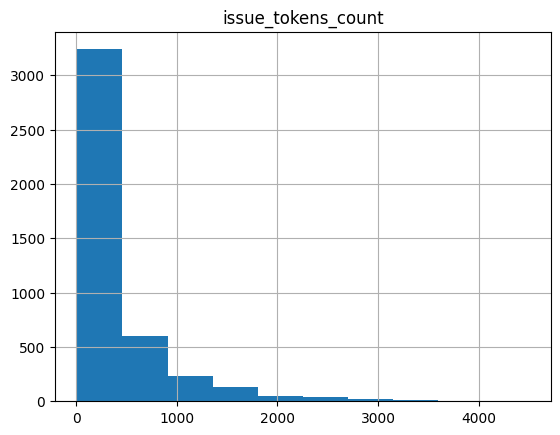

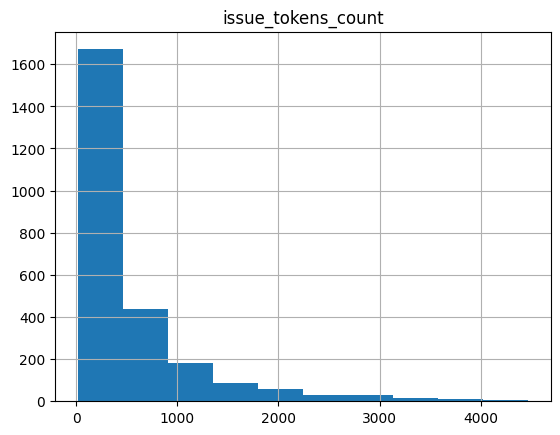

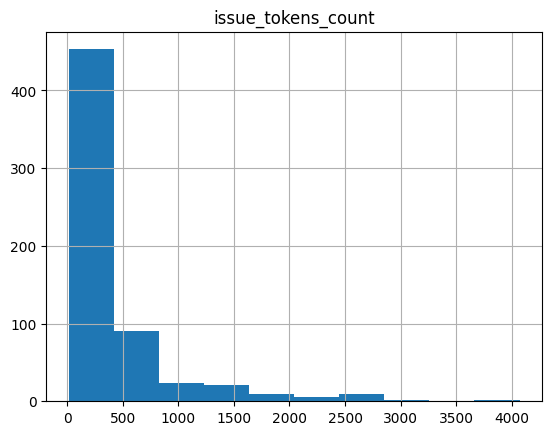

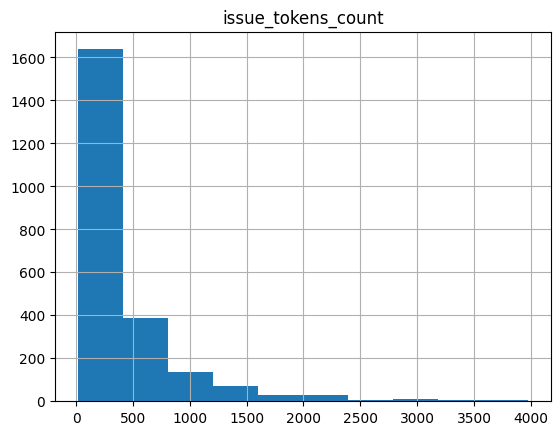

In [25]:
for entity, columns in [
    ('project', ['repo_files_without_tests_count', 'repo_lines_count']),
    ('diff', ['changed_files_without_tests_count', 'changed_lines_count']),
    ('issue', ['issue_lines_count', 'issue_tokens_count'])
]:
    for column in columns:
        for category, language in [('py', 'Python'), ('java', 'Java'), ('kt', 'Kotlin'), ('mixed', 'Mixed')]:
            plt.hist(dfs[category][column])
            plt.title(column)
            plt.grid(True)
            plt.show()

In [26]:
ind = dfs['mixed']['changed_lines_count'].idxmax()
print(dfs['mixed'].loc[ind]['diff'])

diff --git a/doc/changelog.rst b/doc/changelog.rst
index 829d99e1..a830e09d 100644
--- a/doc/changelog.rst
+++ b/doc/changelog.rst
@@ -5,7 +5,24 @@
 Changelog
 
-0.12.0
+0.13.0
+------
+
+`Published 2016-03-15 <https://pypi.python.org/pypi/autobahn/0.13.0>`_
+
+* fix: better traceback logging (`#613 <https://github.com/crossbario/autobahn-python/pull/613>`_)
+* fix: unicode handling in debug messages (`#606 <https://github.com/crossbario/autobahn-python/pull/606>`_)
+* fix: return Deferred from ``run()`` (`#603 <https://github.com/crossbario/autobahn-python/pull/603>`_).
+* fix: more debug logging improvements
+* fix: more `Pattern` tests, fix edge case (`#592 <https://github.com/crossbario/autobahn-python/pull/592>`_).
+* fix: better logging from ``asyncio`` ApplicationRunner
+* new: ``disclose`` becomes a strict router-side feature (`#586 <https://github.com/crossbario/autobahn-python/issues/586>`_).
+* new: subscriber black/whitelisting using authid/authrole
+* new: asyncio websocke